In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from math import log

# Подгрузим данные об объектах недвижимости в Калифорнии

In [2]:
data = fetch_california_housing(as_frame=True)

In [3]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [27]:
df = data.frame
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# Проверим данные на наличие пропусков

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


В данных нет пропусков

# Функция построения модели

* Функция получает на вход датасет и комментарий.
* Датасет разбивается на train, test части.
* Строится модель линейной регрессии.
* Для train, test датасетов производится подсчет метрик качества модели:
    * Model score
    * RMSE
    * R2 score

In [7]:
def get_model_results(df, comment=''):
    """Построение модели линейной регрессии"""

    # выделение таргета из датасета
    df_data = df.drop(columns=['MedHouseVal'])
    df_target = df['MedHouseVal']

    # разбиение на train, test
    X_train, X_test, Y_train, Y_test = train_test_split(df_data, df_target, test_size=0.2, random_state=0)
    
    # Обучение модели на обучающей выборке
    model = LinearRegression()
    model.fit(X_train, Y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Вычисление метрик RMSE, R2 на обучающем и тестовом множестве.
    result = {
        'model': 'LinearRegression',
        'rmse_train': mean_squared_error(Y_train, y_pred_train, squared=False),
        'rmse_test': mean_squared_error(Y_test, y_pred_test, squared=False),
        'r2_train': r2_score(Y_train, y_pred_train),
        'r2_test': r2_score(Y_test, y_pred_test),
        'comment': comment
    }
    return result

In [8]:
common_results = []
current_result = get_model_results(df, 'before_changes')
common_results.append(current_result)
current_result

{'model': 'LinearRegression',
 'rmse_train': 0.7234924745376036,
 'rmse_test': 0.7273129773603123,
 'r2_train': 0.6088968118672868,
 'r2_test': 0.5943232652466193,
 'comment': 'before_changes'}

# Построим график распределения целевой переменной

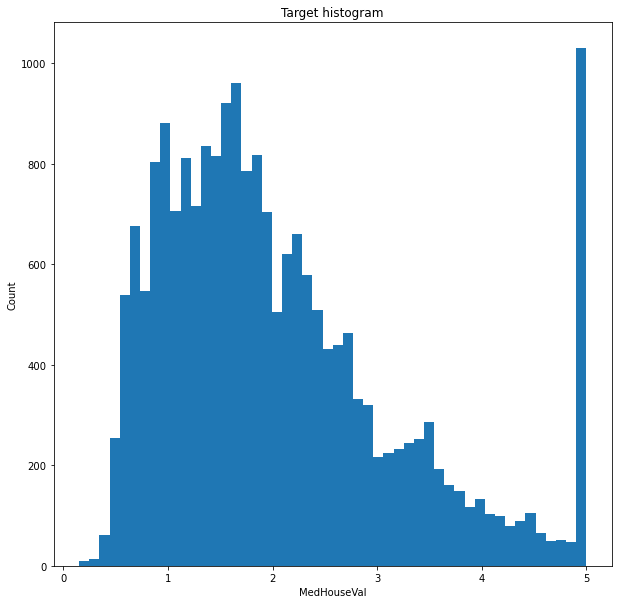

In [9]:
plt.figure(figsize=(10, 10))
plt.hist(data.target, bins=50)
plt.title('Target histogram')
plt.xlabel('MedHouseVal')
plt.ylabel('Count')
plt.show()

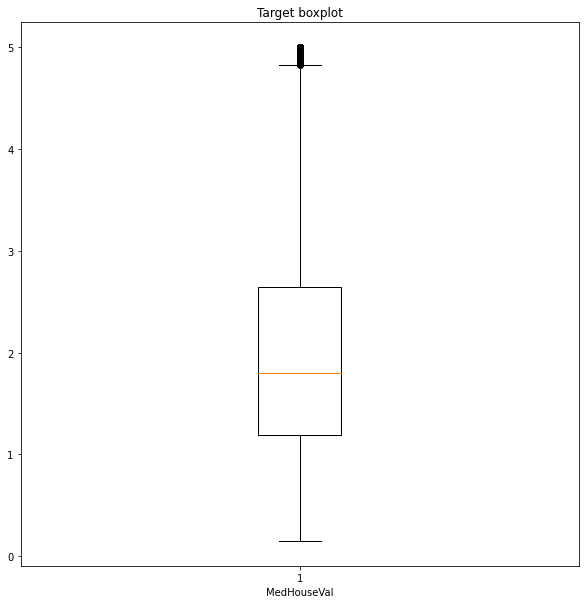

In [10]:
plt.figure(figsize=(10, 10))
plt.boxplot(data.target)
plt.title('Target boxplot')
plt.xlabel('MedHouseVal')
plt.show()

In [11]:
data.target.value_counts()

5.00001    965
1.37500    122
1.62500    117
1.12500    103
1.87500     93
          ... 
3.59200      1
0.54900      1
3.77600      1
0.81200      1
0.47000      1
Name: MedHouseVal, Length: 3842, dtype: int64

In [12]:
df[df.MedHouseVal > 5.0].describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,965.0,7.825123,3.245021e+00,0.499900,5.239100,7.719700,10.112200,15.000100
HouseAge,965.0,33.802073,1.302779e+01,2.000000,24.000000,34.000000,44.000000,52.000000
AveRooms,965.0,6.817436,4.666195e+00,1.824719,5.505593,6.884058,7.893733,141.909091
AveBedrms,965.0,1.097833,8.011475e-01,0.500000,1.009554,1.052227,1.102450,25.636364
Population,965.0,1112.808290,8.133218e+02,13.000000,636.000000,927.000000,1347.000000,7431.000000
AveOccup,965.0,2.570442,1.492767e+00,1.275000,2.079710,2.518789,2.840580,41.214286
Latitude,965.0,35.225751,1.783949e+00,32.680000,33.970000,34.130000,37.400000,38.910000
Longitude,965.0,-119.702477,1.946521e+00,-122.640000,-122.120000,-118.480000,-118.330000,-116.430000
MedHouseVal,965.0,5.000010,3.910011e-14,5.000010,5.000010,5.000010,5.000010,5.000010


Видно, что в целевой переменной имеются выбросы. Предположительно, все самые дорогие объекты уже привели к некому медианному/среднему значению около 5. Возможно, это недвижимость в celebrity районе неподалеку от Beverly Hills, Bel Air, Hollywood. Если взять медианные значения долготы и широты и посмотреть место на географической карте, то это подтверждает догадку

# Посчитаем и выведем корреляционную матрицу

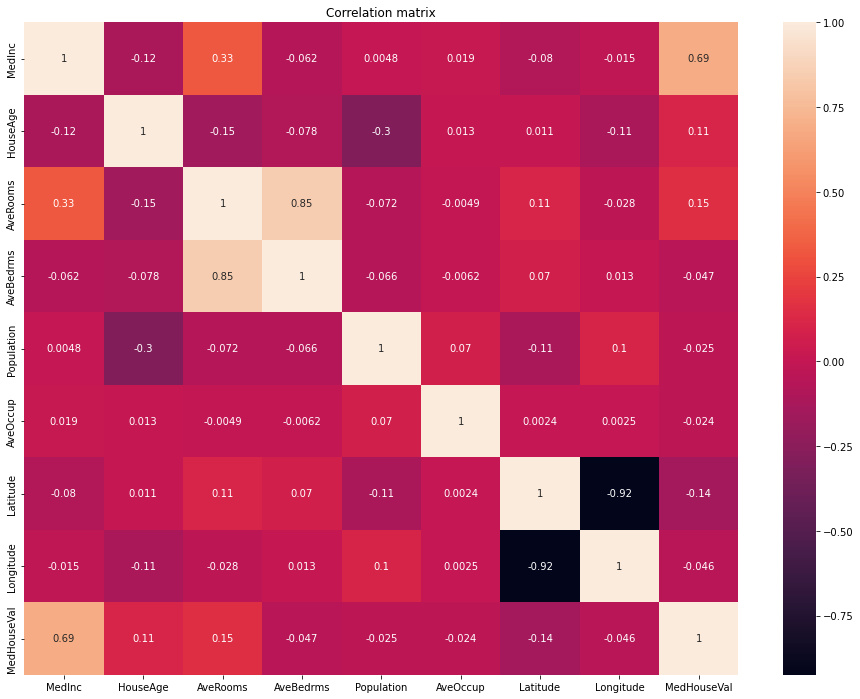

In [13]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation matrix')
plt.show()

Сильная корреляция:
* Latitude - Longitude -0.92
* AveRooms - AveBedrms 0.85
* MedHouseVal(таргет) - MedInc 0.69
* MedInc - AveRooms 0.33
* HouseAge - Population -0.3
* HouseAge - AveRooms -0.15
* AveRooms - MedHouseVal(таргет) 0.15
* Latitude - MedHouseVal(таргет) -0.14

Удалим признаки:
+ AveBedrms, т.к. сильно корреллирует с AveRooms, но AveRooms лучше коррелирует с таргетом

In [14]:
df = data.frame.drop(columns=['AveBedrms'])

Заново построим модель и рассчитаем метрики качества

In [15]:
current_result = get_model_results(df, 'after_removing_cols')
common_results.append(current_result)
current_result

{'model': 'LinearRegression',
 'rmse_train': 0.7314188174268145,
 'rmse_test': 0.7414501124382495,
 'r2_train': 0.6002802761968506,
 'r2_test': 0.5783993232750753,
 'comment': 'after_removing_cols'}

In [16]:
pd.DataFrame(common_results)

,model,rmse_train,rmse_test,r2_train,r2_test,comment
0,LinearRegression,0.723492,0.727313,0.608897,0.594323,before_changes
1,LinearRegression,0.731419,0.741450,0.600280,0.578399,after_removing_cols


# Посмотрим на выбросы и при необходимости удалим их

column='MedInc'


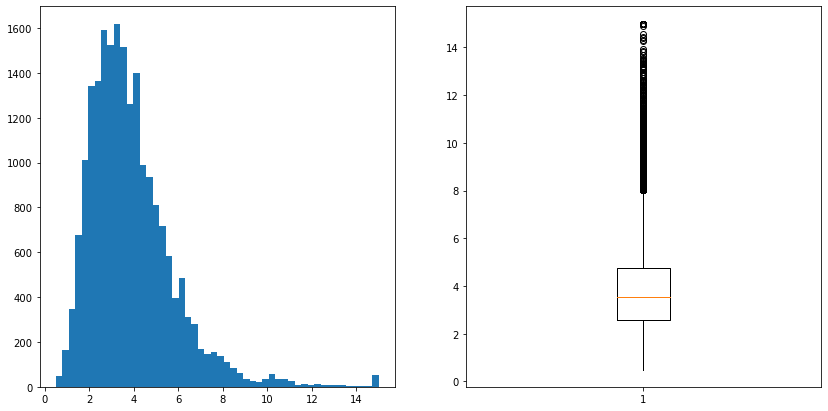

column='HouseAge'


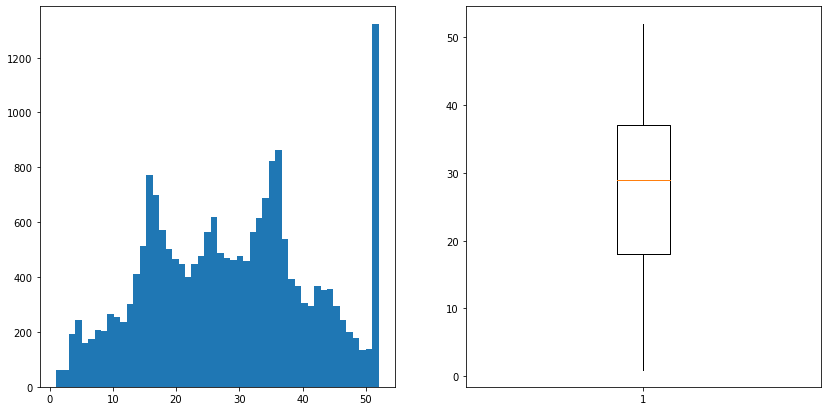

column='AveRooms'


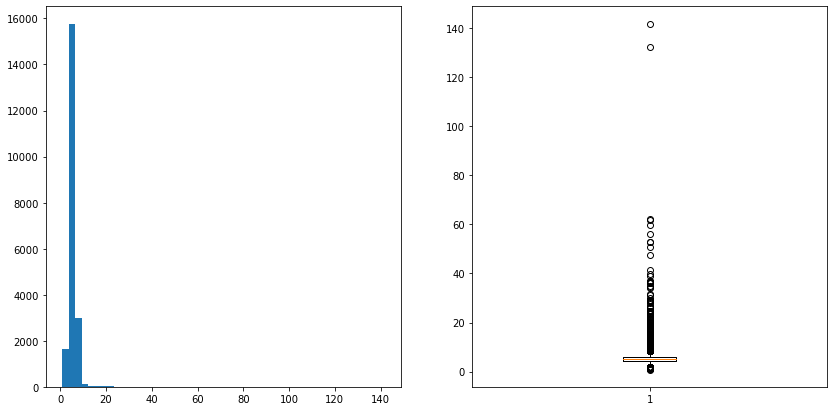

column='Population'


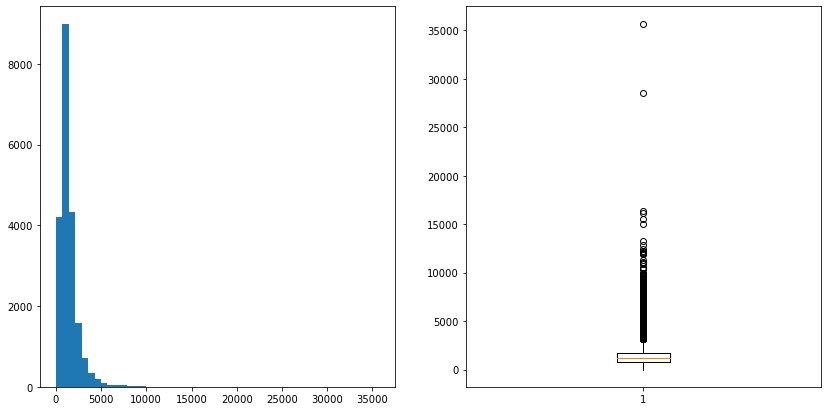

column='AveOccup'


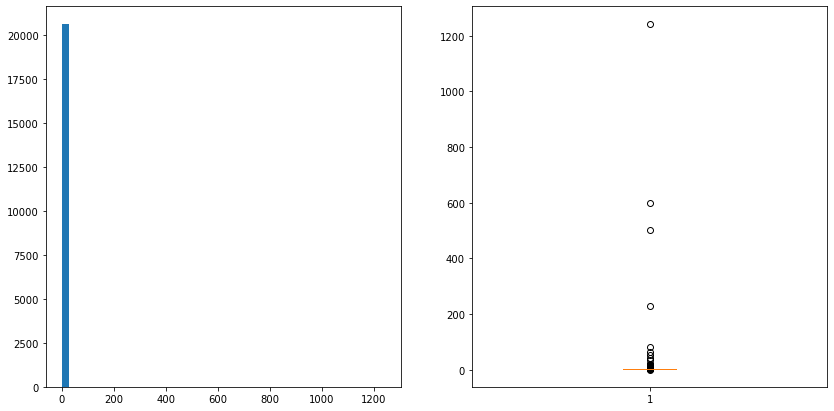

column='Latitude'


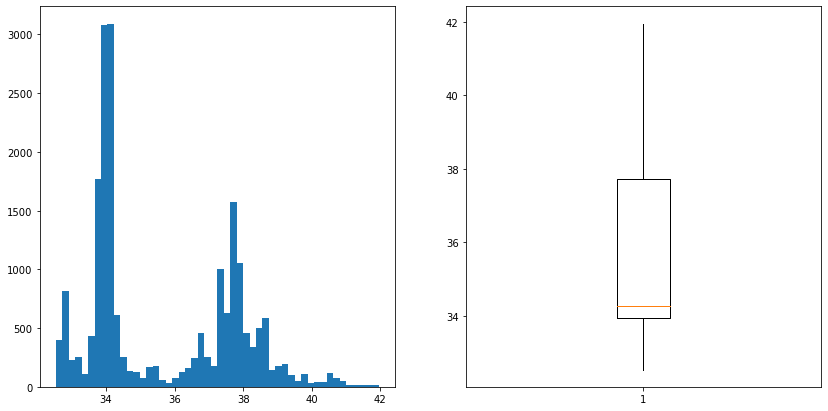

column='Longitude'


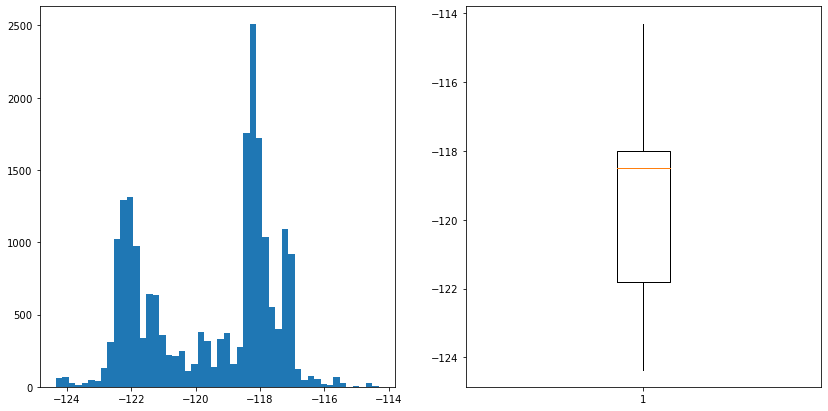

In [17]:
for column in df.drop(columns=['MedHouseVal']).columns:
    print(f'{column=}')
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
    ax1.hist(df[column], bins=50)
    ax2.boxplot(df[column], showcaps=False )
    plt.show()

Рассчитаем долю кол-ва строк, которые будут удалены, если удалить выбросы

In [18]:
100*len(df[((df.MedInc >= 14) | (df.AveRooms >= 22) | (df.Population >= 13000) | (df.AveOccup >= 200))]) / len(df)

0.5910852713178295

Удалим выбросы

In [19]:
df = df[((df.MedInc < 14) & (df.AveRooms < 22) & (df.Population < 13000) & (df.AveOccup < 200))]

Заново построим модель и рассчитаем метрики качества

In [20]:
current_result = get_model_results(df, 'after_removing_outliers')
common_results.append(current_result)
current_result

{'model': 'LinearRegression',
 'rmse_train': 0.7069564277022001,
 'rmse_test': 0.7137025802611836,
 'r2_train': 0.6197307285326796,
 'r2_test': 0.6109915074928749,
 'comment': 'after_removing_outliers'}

In [21]:
pd.DataFrame(common_results)

,model,rmse_train,rmse_test,r2_train,r2_test,comment
0,LinearRegression,0.723492,0.727313,0.608897,0.594323,before_changes
1,LinearRegression,0.731419,0.741450,0.600280,0.578399,after_removing_cols
2,LinearRegression,0.706956,0.713703,0.619731,0.610992,after_removing_outliers


# Изменим несколько признаков на выбор математически

In [22]:
df['MedInc_exp'] = df['MedInc'].apply(lambda x: x**2)

df['Population_sqrt'] = df['Population'].apply(lambda x: x**0.5)

df['AveRooms_log'] = df['AveRooms'].apply(lambda x: log(x))

df['AveOccup_exp'] = df['AveOccup'].apply(lambda x: log(x))

Заново построим модель и рассчитаем метрики качества

In [23]:
current_result = get_model_results(df, 'after_math')
common_results.append(current_result)
current_result

{'model': 'LinearRegression',
 'rmse_train': 0.6550262651499388,
 'rmse_test': 0.6631672503918854,
 'r2_train': 0.6735449682081658,
 'r2_test': 0.664130404757685,
 'comment': 'after_math'}

# Выводы

В работы над данным были последовательно применены преобразования и рассчитаны метрики качества модели после каждого этапа преобразований.

Выполненные преобразования:
* Удаление коррелирующих столбцов
* Удаление выбросов
* Математические преобразования

Согласно таблице ниже, можно сделать вывод, что после выполненных преобразований метрики качества в среднем улучшились

### Таблица метрик качества, после каждого этапа преобразований:

In [24]:
pd.DataFrame(common_results)

,model,rmse_train,rmse_test,r2_train,r2_test,comment
0,LinearRegression,0.723492,0.727313,0.608897,0.594323,before_changes
1,LinearRegression,0.731419,0.741450,0.600280,0.578399,after_removing_cols
2,LinearRegression,0.706956,0.713703,0.619731,0.610992,after_removing_outliers
3,LinearRegression,0.655026,0.663167,0.673545,0.664130,after_math


Видно, что математические преобразования хорошо повлияли на r2 score, хуже на rmse score. Удаление ненужных столбцов хорошо повлияло на rmse score - но хуже на r2 score

Для улучшения качества модели можно еще добавить дополнительный столбец, который на основании Долготы и Широты, указывает на то, что район находится неподалеку от Beverly Hills, Bel Air, Hollywood.